#  Problem statment :
- 1:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.
- 2:
Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#  Import necessary liberaries 


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.simplefilter('ignore')

In [5]:
#load data from github repo
df1=pd.read_csv('https://raw.githubusercontent.com/AliHumadi2000/RandomForest/main/Company_Data.csv')

In [6]:
df1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


# EDA

In [8]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [12]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
# as we can see we have 3 object data we need to convert them to numeric 

In [13]:
#check if there is any null value 
df1.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
#no null vlaue

In [14]:
#check if any duplicate value is ther 
df1.duplicated().sum()

0

In [ ]:
#no duplicate value 

# Data processing  

In [ ]:
# convert categorical var to numeric by using dummy 

In [15]:
data1 = pd.get_dummies(df1, columns = ["ShelveLoc","Urban","US"])

In [16]:
data1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [19]:
#shift Sales column from beginning to last column 
sale=data1['Sales']
data1.drop(columns='Sales',axis=1,inplace=True)
data1['Sales']=sale
data1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,9.50
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,11.22
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,10.06
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,7.40
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,4.15


# Visulization 

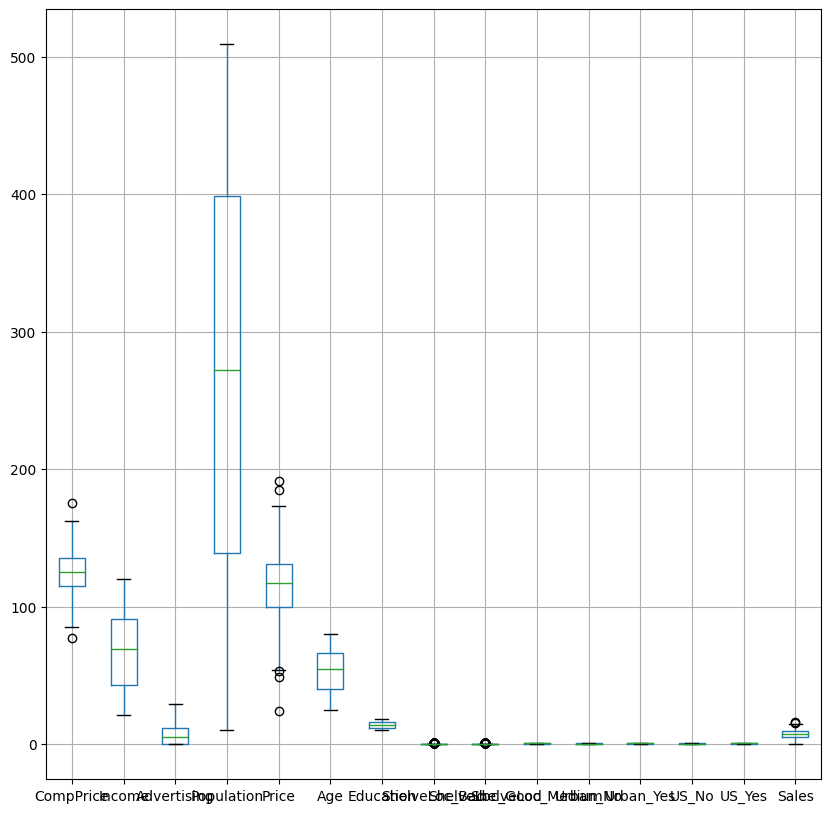

In [24]:
#see the outlier visulization 
plt.figure(figsize=(10,10))
data1.boxplot()
plt.show()

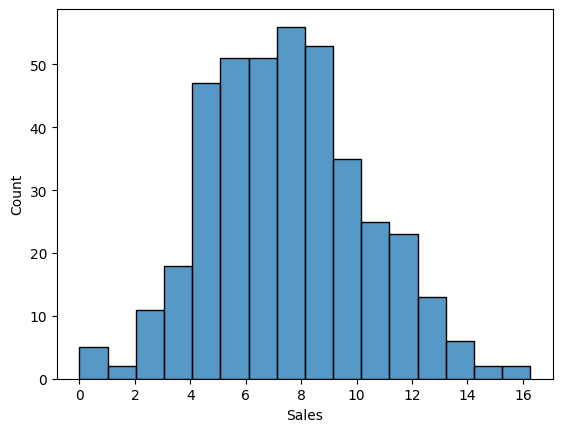

In [26]:
#distribution of sale 
sns.histplot(data1.Sales)
plt.show()

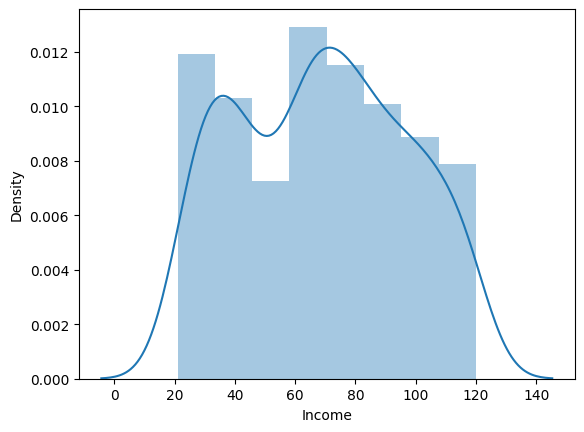

In [31]:
#distrbution of incom 
sns.distplot(data1.Income)
plt.show()

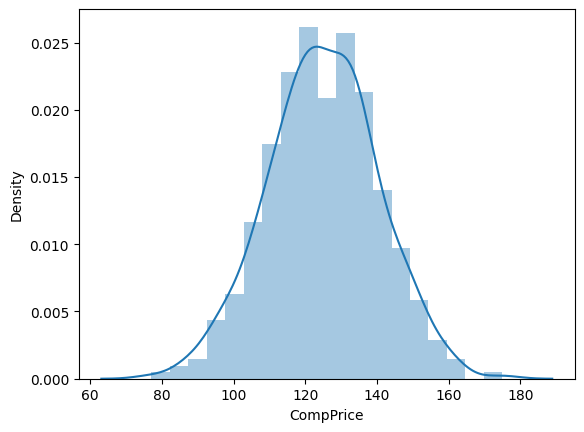

In [33]:
#distrbution of compPrice 
sns.distplot(data1.CompPrice)
plt.show()

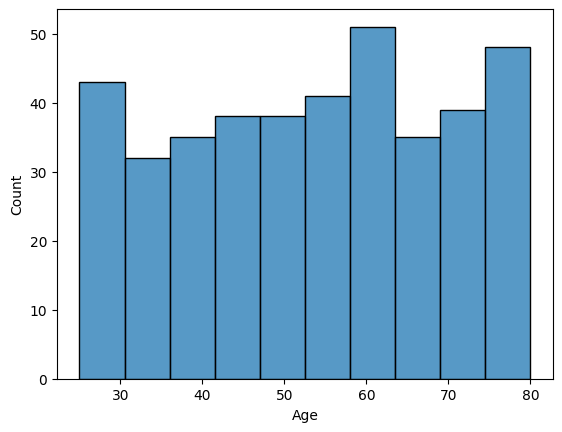

In [36]:
#age 
sns.histplot(data1.Age)
plt.show()

In [40]:
#eduction 
data1['Education'].value_counts()

17    49
12    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: Education, dtype: int64

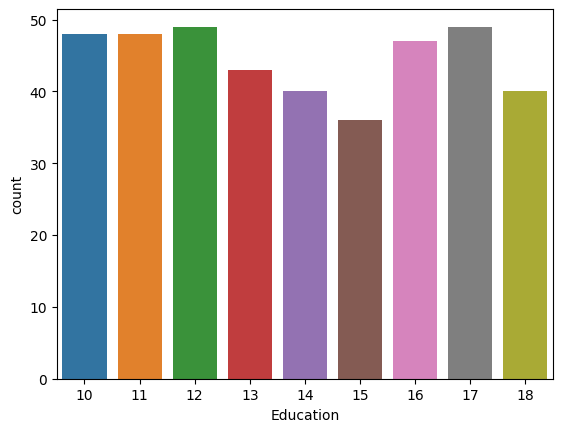

In [42]:
sns.countplot(data1.Education)
plt.show()

# Create The model 

In [44]:
# change the sale column 
data1["sales"]="small"
data1.loc[df1["Sales"]> 7.4,"sales"]="large"
data1.drop(["Sales"],axis=1,inplace=True)

In [45]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small


In [46]:
#spilit the data 
array=data1.values
X = array[:,0:14]
Y = array[:,14]

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y,random_state=43)

In [49]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x_train,y_train)


RandomForestClassifier(max_features=3)

In [50]:
pred=model.predict(x_test)
acc = accuracy_score(y_test, pred) * 100
print("Accuracy =", acc)


Accuracy = 80.0


In [51]:
confusion_matrix(y_test, pred)

array([[33,  8],
       [ 8, 31]], dtype=int64)

In [53]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

       large       0.80      0.80      0.80        41
       small       0.79      0.79      0.79        39

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.80      0.80      0.80        80



In [55]:
results = cross_val_score(model, X,Y, cv=kfold)
results

array([0.775, 0.825, 0.675, 0.75 , 0.775, 0.85 , 0.75 , 0.775, 0.775,
       0.8  ])

In [56]:
#actual vs predict
df=pd.DataFrame({"actual":y_test,"predicted":pred})
df

,actual,predicted
0,large,small
1,large,large
2,large,large
3,large,small
4,large,large
...,...,...
75,large,large
76,large,small
77,large,large
78,large,large


In [57]:
#features imprtance 
column=data1.columns
column=column.drop("sales")
feature=model.feature_importances_
df1=pd.DataFrame({"column":column,"importance":feature})
df1.sort_values("importance",ascending=False)

,column,importance
4,Price,0.232289
5,Age,0.120283
0,CompPrice,0.115689
1,Income,0.110771
3,Population,0.086064
2,Advertising,0.085773
8,ShelveLoc_Good,0.080941
6,Education,0.054455
7,ShelveLoc_Bad,0.048292
9,ShelveLoc_Medium,0.020908


# Problem 2

In [86]:
#load data from rep
df2=pd.read_csv('https://raw.githubusercontent.com/AliHumadi2000/RandomForest/main/Fraud_check.csv')

In [83]:
df2.head(15)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
5,NO,Divorced,116382,0,NO,Good
6,NO,Divorced,80890,8,YES,Good
7,YES,Single,131253,3,YES,Good
8,NO,Single,102481,12,YES,Good
9,YES,Divorced,155482,4,YES,Good


# EDA

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [63]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [64]:
df2.dtypes


Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [65]:
df2.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [66]:
#check if data has null
df2.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [67]:
df2.duplicated().sum()

0

In [ ]:
#no null or duplicate value has been found in this dataset 


# Processing 

In [68]:
df2.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [88]:
data2=pd.get_dummies(df2,['Undergrad','Marital.Status','Urban'])
data2

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [69]:
# #target varaible is Taxable.Incom 
# #taxable_income <= 30000 as "Risky" and others are "Good"
# data1["sales"]="small"
# data1.loc[df1["Sales"]> 7.4,"sales"]="large"
# data1.drop(["Sales"],axis=1,inplace=True)

In [89]:
data2['Taxable_Income']='Good'
data2.loc[df2['Taxable.Income']<=30000,'Taxable_Income']='Risky'
data2.drop(['Taxable.Income'],axis=1,inplace=True)


In [90]:
data2[data2['Taxable_Income']=='Risky']

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income
10,102602,19,1,0,0,0,1,0,1,Risky
12,148033,14,1,0,1,0,0,0,1,Risky
16,34551,29,0,1,1,0,0,1,0,Risky
19,126953,30,1,0,0,0,1,0,1,Risky
21,29106,7,0,1,1,0,0,0,1,Risky
...,...,...,...,...,...,...,...,...,...,...
544,133877,21,1,0,0,0,1,0,1,Risky
557,157421,10,0,1,0,1,0,1,0,Risky
567,129912,30,0,1,0,0,1,1,0,Risky
575,95975,13,1,0,1,0,0,0,1,Risky


In [91]:
df2

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [92]:
df2[df2['Taxable.Income']<=30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


# Vsulzation 

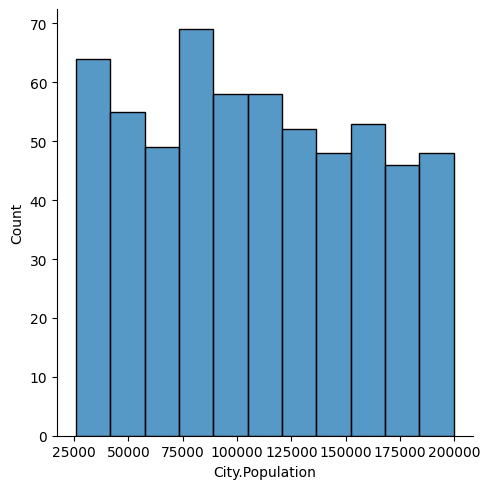

In [94]:
#City populatin 
sns.displot(data2['City.Population'])
plt.show()

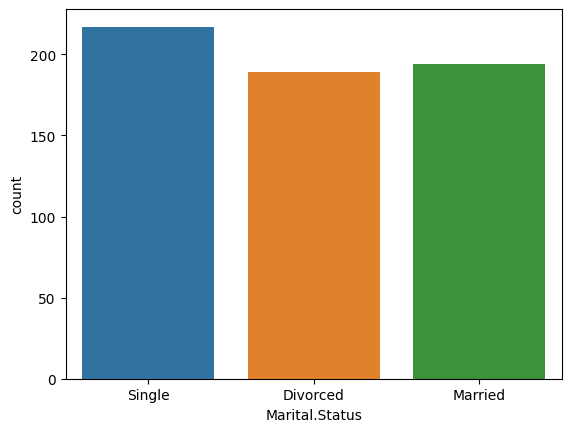

In [96]:
#material status 
sns.countplot(df2['Marital.Status'])
plt.show()

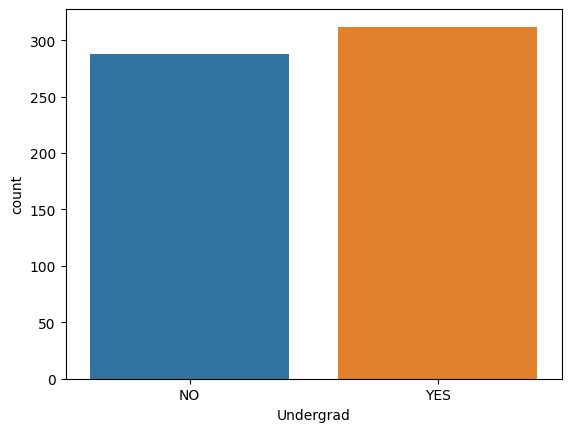

In [97]:
sns.countplot(df2['Undergrad'])
plt.show()

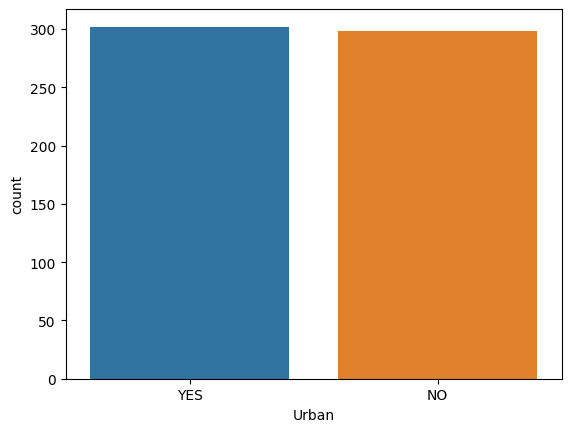

In [98]:
sns.countplot(df2['Urban'])
plt.show()

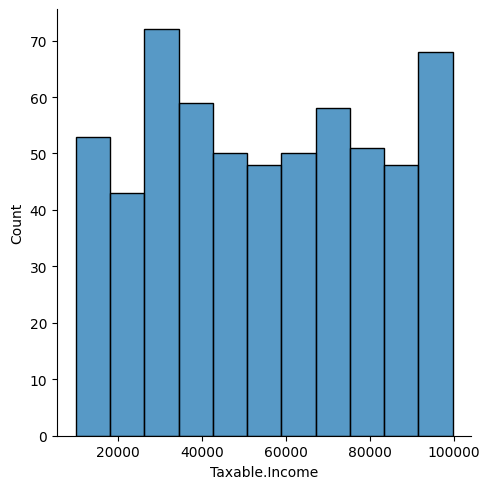

In [100]:
sns.displot(df2['Taxable.Income'])
plt.show()

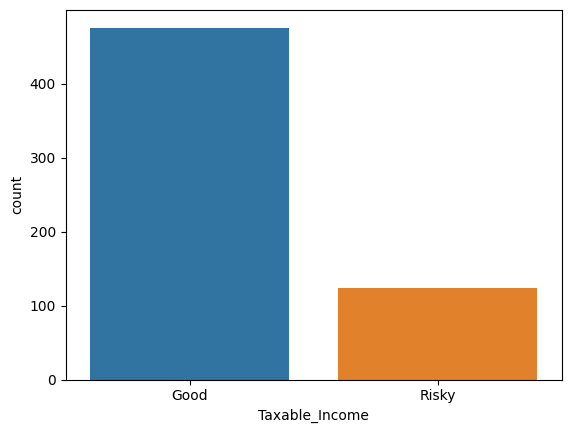

In [102]:
sns.countplot(data2['Taxable_Income'])
plt.show()

# Create The model 

In [112]:
data2.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable_Income
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good


In [116]:
#spilt the data ''
array=data2.values
x=array[:,:-1]
x

array([[50047, 10, 1, ..., 1, 0, 1],
       [134075, 18, 0, ..., 0, 0, 1],
       [160205, 30, 1, ..., 0, 0, 1],
       ...,
       [154058, 0, 1, ..., 0, 0, 1],
       [180083, 17, 0, ..., 0, 1, 0],
       [158137, 16, 1, ..., 0, 1, 0]], dtype=object)

In [118]:
y=array[:,-1]
y

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=43)

In [120]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [123]:
pred=model.predict(x_test)

In [124]:
acc = accuracy_score(y_test, pred) * 100
print("Accuracy =", acc)


Accuracy = 75.0


In [125]:
print(confusion_matrix(pred,y_test))

[[89 24]
 [ 6  1]]


In [126]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

        Good       0.94      0.79      0.86       113
       Risky       0.04      0.14      0.06         7

    accuracy                           0.75       120
   macro avg       0.49      0.47      0.46       120
weighted avg       0.88      0.75      0.81       120

